In [50]:
import seaborn as sns
import pandas as pd
import re

from matplotlib import pyplot as plt

In [25]:
def parse_log(log_file):
    runtime_with_rmp = []
    runtime_without_rmp = []
    with open(log_file, 'r') as f:
        data = f.read()
    res = re.findall(r'elapsed time for ILP: ([\.\d]+)', data)
    for i in range(0, len(res), 2):
        runtime_with_rmp.append(float(res[i]))
        runtime_without_rmp.append(float(res[i+1]))
    return runtime_with_rmp, runtime_without_rmp


def plot_domain_size(log_dir, min_domain_size, max_domain_size):
    data = []
    for i in range(min_domain_size, max_domain_size + 1):
        runtime_with_rmp, runtime_without_rmp = parse_log('{}/{}.log'.format(log_dir, i))
        for k, l in zip(runtime_with_rmp, runtime_without_rmp):
            data.append(['With RMP', i, k])
            data.append(['Without RMP', i, l])
    dataframe = pd.DataFrame(data, columns=['Method', 'Domain size', 'Runtime of ILP (s)'])
    sns.lineplot(x='Domain size', y='Runtime of ILP (s)', hue='Method', style='Method', data=dataframe)
    
    

def plot_evidence_pct(log_dir, min_pct, max_pct):
    data = []
    for i in range(min_pct, max_pct + 1):
        pct = i / 10
        runtime_with_rmp, runtime_without_rmp = parse_log('{}/{}.log'.format(log_dir, pct))
        for k, l in zip(runtime_with_rmp, runtime_without_rmp):
            data.append(['With RMP', pct, k])
            data.append(['Without RMP', pct, l])
    dataframe = pd.DataFrame(data, columns=['Method', 'Evidence %', 'Runtime of ILP (s)'])
    sns.lineplot(x='Evidence %', y='Runtime of ILP (s)', hue='Method', style='Method', data=dataframe)

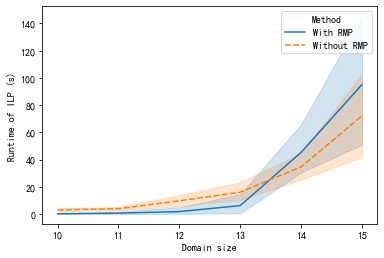

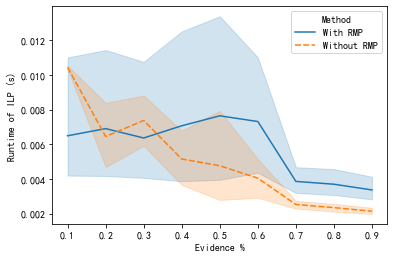

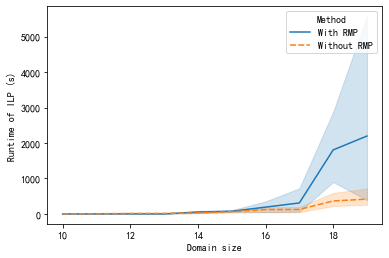

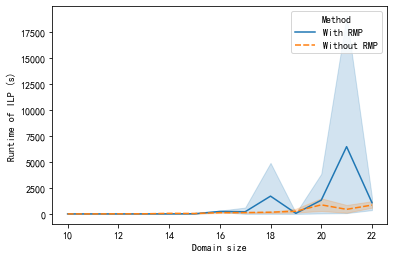

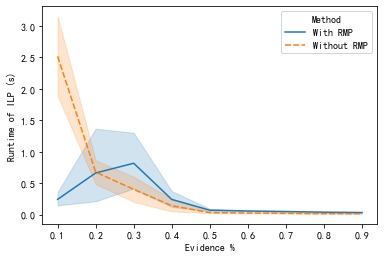

In [79]:
# plot_domain_size('./logs/domain_size/fr_sm/', 10, 30)
# plt.show()

# plot_evidence_pct('./logs/evidence_number/fr_sm/', 1, 9)
# plt.show()


plot_domain_size('./logs/domain_size/fr_sm/neg_weight/', 10, 15)
plt.show()
plot_evidence_pct('./logs/evidence_number/fr_sm/negate/', 1, 9)
plt.show()

plot_domain_size('./logs/domain_size/fr_sm/pn/', 10, 19)
plt.show()
plot_domain_size('./logs/domain_size/fr_sm/pn_full_rmp/', 10, 22)
plt.show()
plot_evidence_pct('./logs/evidence_number/fr_sm/pn/', 1, 9)
plt.show()


# plot_domain_size('./logs/domain_size/fr_sm_cc/', 10, 18)
# plt.show()
# plot_evidence_pct('./logs/evidence_number/fr_sm_cc/', 1, 9)
# plt.show()